In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def train_model(dataset, model_type='svm', **kwargs):
    """
    Funkcja trenująca model na podstawie podanego zbioru danych i modelu.

    Args:
        dataset: Ramka danych zawierająca cechy i etykiety.
        model_type: Typ modelu do wytrenowania ('svm' dla SVM, 'logistic' dla regresji logistycznej, 'xgboost' dla XGBoost).
        **kwargs: Dodatkowe argumenty przekazywane do konstruktora modelu.

    Returns:
        model: Wytrenowany model.
        accuracy: Dokładność modelu na zestawie testowym.
    """
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if model_type == 'svm':
        model = SVC(**kwargs)
    elif model_type == 'logistic':
        model = LogisticRegression(**kwargs)
    elif model_type == 'xgboost':
        model = xgb.XGBClassifier(**kwargs)

    start_train_time = time.time()
    model.fit(X_train, y_train)
    end_train_time = time.time()
    train_time = end_train_time - start_train_time
    print(train_time)

    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    end_predict_time = time.time()
    predict_time = end_predict_time - start_predict_time
    print(predict_time)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return model, accuracy, precision, recall, cm

## Diabetes

In [12]:
diabetes = pd.read_csv("/kaggle/input/choroby/diabetes_clean.csv")

svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(diabetes, model_type='svm')
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(diabetes, model_type='logistic')
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(diabetes, model_type='xgboost')

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej: ", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej: ", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej: ", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)


79.98232412338257
19.19015645980835


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6168744564056396
0.0035283565521240234
0.439589262008667
0.01669144630432129
Dokładność modelu SVM: 0.7411603680328492
Dokładność modelu regresji logistycznej:  0.7413884875674853
Dokładność modelu XGBoost: 0.7375864953235496
Precyzja modelu SVM: 0.7234730848861284
Precyzja modelu regresji logistycznej:  0.7415118066228867
Precyzja modelu XGBoost: 0.7306702775897088
Czułość modelu SVM: 0.8152522601341499
Czułość modelu regresji logistycznej:  0.773840769903762
Czułość modelu XGBoost: 0.7868183143773695
Macierz pomyłek modelu SVM:  [[4156 2137]
 [1267 5591]]
Macierz pomyłek regresji logistycznej:  [[4443 1850]
 [1551 5307]]
Macierz pomyłek modelu XGBoost:  [[4304 1989]
 [1462 5396]]


## Hypertension

In [13]:
hypertension = pd.read_csv("/kaggle/input/choroby/hypertension_clean.csv")

svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(hypertension, model_type='svm')
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(hypertension, model_type='logistic')
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(hypertension, model_type='xgboost')

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej:", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej:", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej:", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)


14.59269118309021
3.490936279296875


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.2680659294128418
0.0030705928802490234
0.26064181327819824
0.008120059967041016
Dokładność modelu SVM: 0.7526529037237122
Dokładność modelu regresji logistycznej: 0.8419834072930735
Dokładność modelu XGBoost: 1.0
Precyzja modelu SVM: 0.7452917567150356
Precyzja modelu regresji logistycznej: 0.825507614213198
Precyzja modelu XGBoost: 1.0
Czułość modelu SVM: 0.8408220132358063
Czułość modelu regresji logistycznej: 0.9063044235458029
Czułość modelu XGBoost: 1.0
Macierz pomyłek modelu SVM:  [[1487  825]
 [ 457 2414]]
Macierz pomyłek regresji logistycznej:  [[1762  550]
 [ 269 2602]]
Macierz pomyłek modelu XGBoost:  [[2312    0]
 [   0 2871]]


## Stroke

In [14]:
stroke = pd.read_csv("/kaggle/input/choroby/stroke_clean.csv")

svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(stroke, model_type='svm')
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(stroke, model_type='logistic')
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(stroke, model_type='xgboost')

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej:", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej:", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej:", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)

40.27463960647583
8.875219345092773


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.36395907402038574
0.003082275390625
0.30688953399658203
0.009633779525756836
Dokładność modelu SVM: 0.6567292356766041
Dokładność modelu regresji logistycznej: 0.6802846276530488
Dokładność modelu XGBoost: 0.9969328916697338
Precyzja modelu SVM: 0.7221830985915493
Precyzja modelu regresji logistycznej: 0.7089080459770115
Precyzja modelu XGBoost: 0.9938800489596084
Czułość modelu SVM: 0.5051724137931034
Czułość modelu regresji logistycznej: 0.6076354679802956
Czułość modelu XGBoost: 1.0
Macierz pomyłek modelu SVM:  [[3302  789]
 [2009 2051]]
Macierz pomyłek regresji logistycznej:  [[3078 1013]
 [1593 2467]]
Macierz pomyłek modelu XGBoost:  [[4066   25]
 [   0 4060]]


# Strojenie hiperparaemtrów - GridSearchCV

In [15]:
def tune_svm_model(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly']
    }
    svm = SVC()
    grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='recall')
    grid_search.fit(X_train, y_train)
    best_svm_model = grid_search.best_estimator_
    recall = grid_search.best_score_
    return best_svm_model, recall

def tune_logistic_regression(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
    logistic = LogisticRegression(max_iter=1000)
    grid_search = GridSearchCV(logistic, param_grid, cv=3, scoring='recall')
    grid_search.fit(X_train, y_train)
    best_logistic_model = grid_search.best_estimator_
    recall = grid_search.best_score_
    return best_logistic_model, recall

def tune_xgboost_model(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7, 0.9],
        'colsample_bytree': [0.5, 0.7, 0.9]
    }
    xgboost = xgb.XGBClassifier()
    grid_search = GridSearchCV(xgboost, param_grid, cv=3, scoring='recall')
    grid_search.fit(X_train, y_train)
    best_xgboost_model = grid_search.best_estimator_
    recall = grid_search.best_score_
    return best_xgboost_model, recall

In [16]:
diabetes = pd.read_csv("/kaggle/input/choroby/diabetes_clean.csv")
hypertension = pd.read_csv("/kaggle/input/choroby/hypertension_clean.csv")
stroke = pd.read_csv("/kaggle/input/choroby/stroke_clean.csv")

#best_svm_diabetes, accuracy_svm_diabetes = tune_svm_model(diabetes)
#print(best_svm_diabetes, accuracy_svm_diabetes)
best_logistic_diabetes, accuracy_logistic_diabetes = tune_logistic_regression(diabetes)
print(best_logistic_diabetes, accuracy_logistic_diabetes)
best_xgboost_diabetes, accuracy_xgboost_diabetes = tune_xgboost_model(diabetes)
print(best_xgboost_diabetes, accuracy_xgboost_diabetes)

#best_svm_hypertension, accuracy_svm_hypertension = tune_svm_model(hypertension)
#print(best_svm_hypertension, accuracy_svm_hypertension)
best_logistic_hypertension, accuracy_logistic_hypertension = tune_logistic_regression(hypertension)
print(best_logistic_hypertension, accuracy_logistic_hypertension)
best_xgboost_hypertension, accuracy_xgboost_hypertension = tune_xgboost_model(hypertension)
print(best_xgboost_hypertension, accuracy_xgboost_hypertension)

#best_svm_stroke, accuracy_svm_stroke = tune_svm_model(stroke)
#print(best_svm_stroke, accuracy_svm_stroke)
best_logistic_stroke, accuracy_logistic_stroke = tune_logistic_regression(stroke)
print(best_logistic_stroke, accuracy_logistic_stroke)
best_xgboost_stroke, accuracy_xgboost_stroke = tune_xgboost_model(stroke)
print(best_xgboost_stroke, accuracy_xgboost_stroke)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear') 0.7794317638842946
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) 0.8168118498915721
LogisticRegression(C=0.1, max_iter=1000) 0.9230768906810979
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylev

After gridSearchCV

In [17]:
svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(diabetes, model_type='svm', kernel='rbf', C=0.1)
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(diabetes, model_type='logistic', C=0.1, max_iter=1000, solver='liblinear')
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(diabetes, model_type='xgboost', learning_rate=0.01, max_depth=7, min_child_weight=3, colsample_bytree=0.5)

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej: ", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej: ", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej: ", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)

82.94651651382446
20.33363175392151
0.2698538303375244
0.0021238327026367188
0.5771756172180176
0.018311023712158203
Dokładność modelu SVM: 0.7315793475781309
Dokładność modelu regresji logistycznej:  0.7413124477226066
Dokładność modelu XGBoost: 0.743897802448483
Precyzja modelu SVM: 0.7124616956077631
Precyzja modelu regresji logistycznej:  0.7408698076386953
Precyzja modelu XGBoost: 0.727509778357236
Czułość modelu SVM: 0.8136482939632546
Czułość modelu regresji logistycznej:  0.7750072907553223
Czułość modelu XGBoost: 0.8136482939632546
Macierz pomyłek modelu SVM:  [[4041 2252]
 [1278 5580]]
Macierz pomyłek regresji logistycznej:  [[4434 1859]
 [1543 5315]]
Macierz pomyłek modelu XGBoost:  [[4203 2090]
 [1278 5580]]


In [18]:
accuracy_diabetes = [0.7411603680328492, 0.7413884875674853, 0.7375864953235496, 0.7315793475781309, 0.7413124477226066, 0.743897802448483]
precision_diabetes = [0.7234730848861284, 0.7413769026672252, 0.7306702775897088, 0.7124616956077631, 0.7408698076386953, 0.727509778357236]
recall_diabetes = [0.8152522601341499, 0.7741324001166521, 0.7868183143773695, 0.8136482939632546, 0.7750072907553223, 0.8136482939632546]
matrix_svm_before_diabetes = [[4156, 2137], [1267, 5591]]
matrix_log_before_diabetes =  [[4441, 1852], [1549, 5309]]
matrix_xgb_before_diabetes = [[4304, 1989], [1462, 5396]]
matrix_svm_after_diabetes = [[4041, 2252], [1278, 5580]]
matrix_log_after_diabetes = [[4434, 1859],[1543, 5315]]
matrix_xgb_after_diabetes = [[4204, 2089],[1278, 5580]]

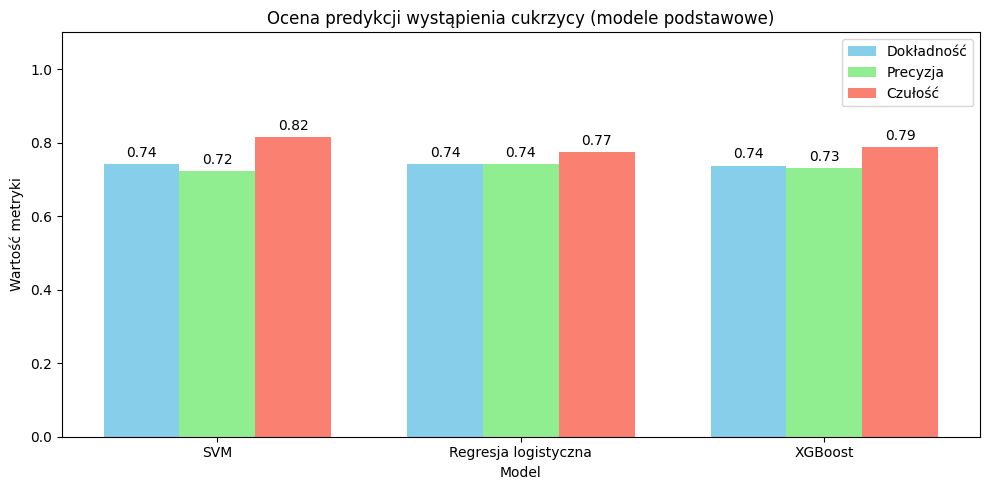

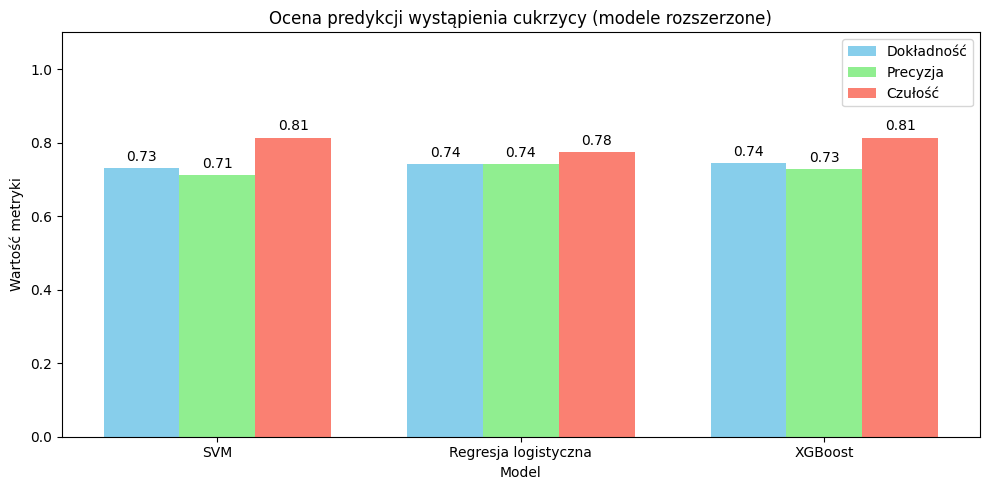

In [19]:
# Etykiety osi X
x_labels_before = ['SVM', 'Regresja logistyczna', 'XGBoost']
x_labels_after = ['SVM', 'Regresja logistyczna', 'XGBoost']

# Podział danych przed i po
accuracy_before = accuracy_diabetes[0:3]
accuracy_after = accuracy_diabetes[3:6]

precision_before = precision_diabetes[0:3]
precision_after = precision_diabetes[3:6]

recall_before = recall_diabetes[0:3]
recall_after = recall_diabetes[3:6]

# Funkcja do dodawania wartości słupków
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Wykresy przed przetworzeniem danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels_before))
width = 0.25

rects1 = ax.bar(x - width, accuracy_before, width, label='Dokładność', color='skyblue')
rects2 = ax.bar(x, precision_before, width, label='Precyzja', color='lightgreen')
rects3 = ax.bar(x + width, recall_before, width, label='Czułość', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Wartość metryki')
ax.set_title('Ocena predykcji wystąpienia cukrzycy (modele podstawowe)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels_before)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('cukrzyca_przed.png')
plt.show()

# Wykresy po przetworzeniu danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels_after))
width = 0.25

rects1 = ax.bar(x - width, accuracy_after, width, label='Dokładność', color='skyblue')
rects2 = ax.bar(x, precision_after, width, label='Precyzja', color='lightgreen')
rects3 = ax.bar(x + width, recall_after, width, label='Czułość', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Wartość metryki')
ax.set_title('Ocena predykcji wystąpienia cukrzycy (modele rozszerzone)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels_after)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('cukrzyca_po.png')
plt.show()

In [20]:
def plot_confusion_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Macierze błędów przed przetworzeniem danych
#plot_confusion_matrix(matrix_svm_before_diabetes, 'Confusion Matrix SVM (przed strojeniem hiperparametrów)')
#plot_confusion_matrix(matrix_log_before_diabetes, 'Confusion Matrix Regresja Logistyczna (przed strojeniem hiperparametrów)')
#plot_confusion_matrix(matrix_xgb_before_diabetes, 'Confusion Matrix XGBoost (przed strojeniem hiperparametrów)')

# Macierze błędów po przetworzeniu danych
#plot_confusion_matrix(matrix_svm_after_diabetes, 'Confusion Matrix SVM (po strojeniu hiperparametrów)')
#plot_confusion_matrix(matrix_log_after_diabetes, 'Confusion Matrix Regresja Logistyczna (po strojeniu hiperparametrów)')
#plot_confusion_matrix(matrix_xgb_after_diabetes, 'Confusion Matrix XGB (po strojeniu hiperparametrów)')

In [21]:
svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(hypertension, model_type='svm', kernel='rbf', C=0.1)
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(hypertension, model_type='logistic', C=0.1, max_iter=1000)
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(hypertension, model_type='xgboost', learning_rate=0.01, max_depth=7, min_child_weight=1, colsample_bytree=0.5)

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej:", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej:", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej:", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)

14.867096424102783
3.573765754699707
1.6040945053100586
0.003215312957763672
0.3161485195159912
0.01036977767944336
Dokładność modelu SVM: 0.6922631680493923
Dokładność modelu regresji logistycznej: 0.8587690526721976
Dokładność modelu XGBoost: 0.9918965849893884
Precyzja modelu SVM: 0.6885342789598109
Precyzja modelu regresji logistycznej: 0.8368503937007874
Precyzja modelu XGBoost: 0.9855818743563337
Czułość modelu SVM: 0.8115639150121908
Czułość modelu regresji logistycznej: 0.9254615116684082
Czułość modelu XGBoost: 1.0
Macierz pomyłek modelu SVM:  [[1258 1054]
 [ 541 2330]]
Macierz pomyłek regresji logistycznej:  [[1794  518]
 [ 214 2657]]
Macierz pomyłek modelu XGBoost:  [[2270   42]
 [   0 2871]]


In [22]:
accuracy_hypertension = [0.7526529037237122, 0.8450704225352113, 1.0, 0.6922631680493923, 0.8587690526721976, 0.9918965849893884]
precision_hypertension = [0.7452917567150356, 0.8257718966603654, 1.0, 0.6885342789598109, 0.8368503937007874, 0.9855818743563337]
recall_hypertension = [0.8408220132358063, 0.9129223267154302, 1.0, 0.8115639150121908, 0.9254615116684082, 1.0]
matrix_svm_before_hypertension = [[1487,  825], [ 457, 2414]]
matrix_log_before_hypertension = [[1759,  553], [250, 2621]]
matrix_xgb_before_hypertension = [[2312,    0], [0, 2871]]
matrix_svm_after_hypertension = [[1258,  1054], [ 541, 2330]]
matrix_log_after_hypertension = [[1794,  518], [214, 2657]]
matrix_xgb_after_hypertension = [[2270,  43], [0, 2871]]

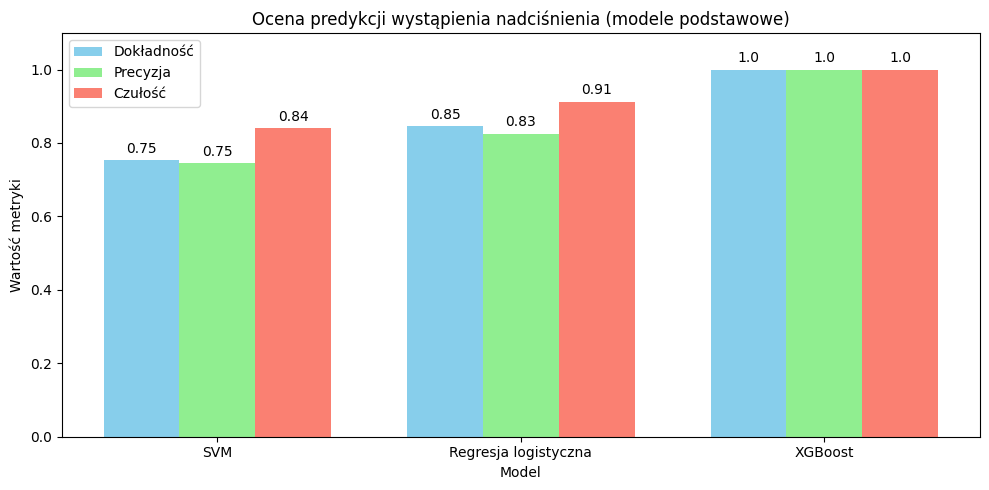

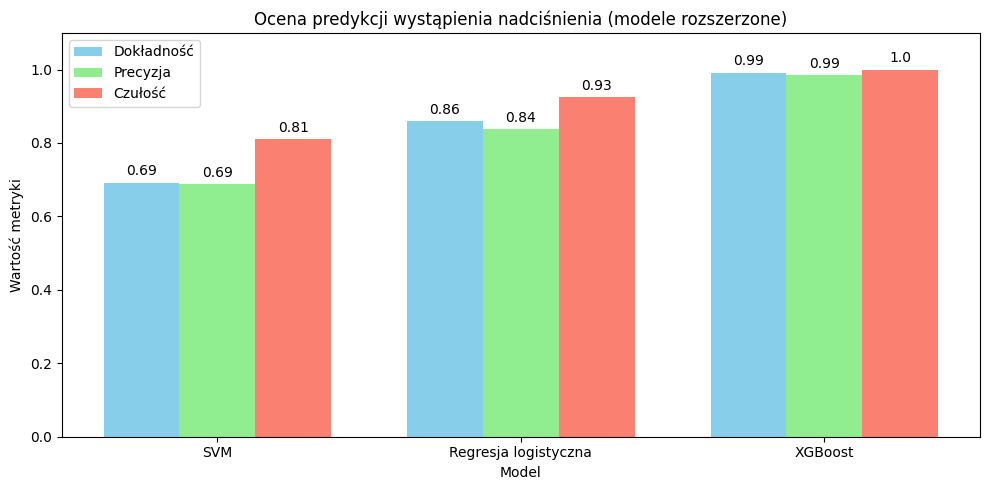

In [23]:
# Etykiety osi X
x_labels_before = ['SVM', 'Regresja logistyczna', 'XGBoost']
x_labels_after = ['SVM', 'Regresja logistyczna', 'XGBoost']

# Podział danych przed i po
accuracy_before = accuracy_hypertension[0:3]
accuracy_after = accuracy_hypertension[3:6]

precision_before = precision_hypertension[0:3]
precision_after = precision_hypertension[3:6]

recall_before = recall_hypertension[0:3]
recall_after = recall_hypertension[3:6]

# Wykresy przed przetworzeniem danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels_before))
width = 0.25

rects1 = ax.bar(x - width, accuracy_before, width, label='Dokładność', color='skyblue')
rects2 = ax.bar(x, precision_before, width, label='Precyzja', color='lightgreen')
rects3 = ax.bar(x + width, recall_before, width, label='Czułość', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Wartość metryki')
ax.set_title('Ocena predykcji wystąpienia nadciśnienia (modele podstawowe)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels_before)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('nadcisnienie_przed.png')
plt.show()

# Wykresy po przetworzeniu danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels_after))
width = 0.25

rects1 = ax.bar(x - width, accuracy_after, width, label='Dokładność', color='skyblue')
rects2 = ax.bar(x, precision_after, width, label='Precyzja', color='lightgreen')
rects3 = ax.bar(x + width, recall_after, width, label='Czułość', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Wartość metryki')
ax.set_title('Ocena predykcji wystąpienia nadciśnienia (modele rozszerzone)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels_after)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('nadcisnienie_po.png')
plt.show()

In [24]:
def plot_confusion_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Macierze błędów przed przetworzeniem danych
#plot_confusion_matrix(matrix_svm_before_hypertension, 'Confusion Matrix SVM (przed strojeniem hiperparametrów)')
#plot_confusion_matrix(matrix_log_before_hypertension, 'Confusion Matrix Regresja Logistyczna (przed strojeniem hiperparametrów)')
#plot_confusion_matrix(matrix_xgb_before_hypertension, 'Confusion Matrix XGBoost (przed strojeniem hiperparametrów)')

# Macierze błędów po przetworzeniu danych
#plot_confusion_matrix(matrix_svm_after_hypertension, 'Confusion Matrix SVM (po strojeniu hiperparametrów)')
#plot_confusion_matrix(matrix_log_after_hypertension, 'Confusion Matrix Regresja Logistyczna (po strojeniu hiperparametrów)')
#plot_confusion_matrix(matrix_xgb_after_hypertension, 'Confusion Matrix XGB (po strojeniu hiperparametrów)')

In [25]:
stroke = pd.read_csv("/kaggle/input/choroby/stroke_clean.csv")

svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(stroke, model_type='svm', kernel='rbf', C=10)
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(stroke, model_type='logistic', C=0.1, max_iter=1000)
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(stroke, model_type='xgboost', learning_rate=0.3, max_depth=5, min_child_weight=5, colsample_bytree=0.5)

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej:", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej:", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej:", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)

36.87779974937439
8.769473791122437
0.9633862972259521
0.0032854080200195312
0.27303361892700195
0.008852958679199219
Dokładność modelu SVM: 0.6952521163047479
Dokładność modelu regresji logistycznej: 0.6840878419825788
Dokładność modelu XGBoost: 0.9690835480309165
Precyzja modelu SVM: 0.7324483775811209
Precyzja modelu regresji logistycznej: 0.7106382978723405
Precyzja modelu XGBoost: 0.9417633410672854
Czułość modelu SVM: 0.611576354679803
Czułość modelu regresji logistycznej: 0.6169950738916257
Czułość modelu XGBoost: 0.9997536945812808
Macierz pomyłek modelu SVM:  [[3184  907]
 [1577 2483]]
Macierz pomyłek regresji logistycznej:  [[3071 1020]
 [1555 2505]]
Macierz pomyłek modelu XGBoost:  [[3840  251]
 [   1 4059]]


In [26]:
accuracy_stroke = [0.6567292356766041, 0.6804073119862594, 0.9969328916697338, 0.6952521163047479, 0.6842105263157895, 0.9690835480309165]
precision_stroke = [0.7221830985915493, 0.7089916690606147, 0.9938800489596084, 0.7324483775811209, 0.7104815864022663, 0.9417633410672854]
recall_stroke = [0.5051724137931034, 0.6078817733990147, 1.0, 0.5051724137931034, 0.611576354679803, 0.9997536945812808]
matrix_svm_before_stroke = [[3302,  789], [2009, 2051]]
matrix_log_before_stroke = [[3078, 1013], [1592, 2648]]
matrix_xgb_before_stroke = [[4066,   25], [0, 4060]]
matrix_svm_after_stroke = [[3184,  907], [1577, 2483]]
matrix_log_after_stroke = [[3069, 1022],[1552, 2508]]
matrix_xgb_after_stroke = [[3840,  251], [1, 4059]]

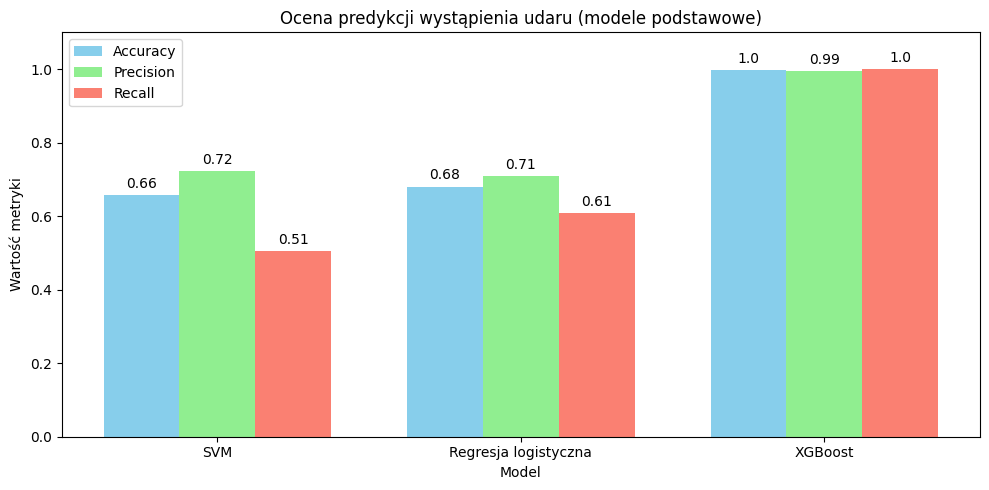

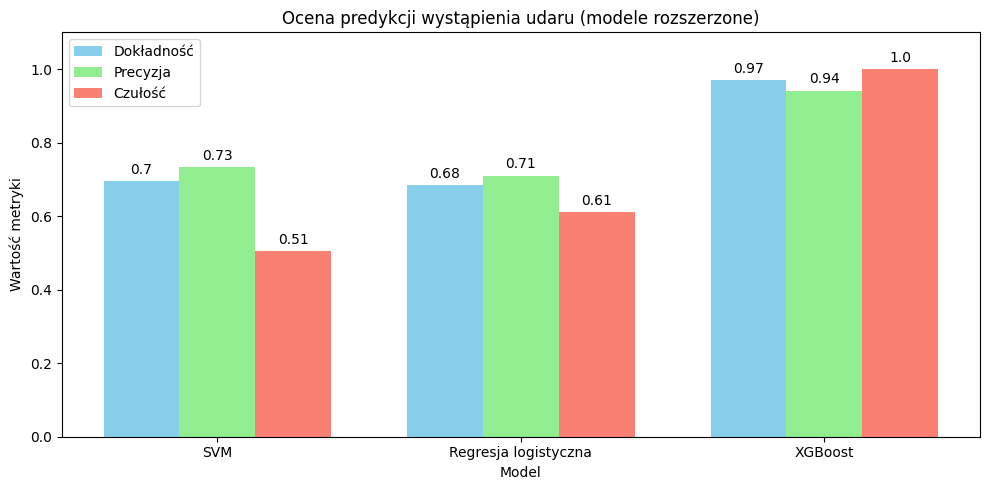

In [27]:
# Etykiety osi X
x_labels_before = ['SVM', 'Regresja logistyczna', 'XGBoost']
x_labels_after = ['SVM', 'Regresja logistyczna', 'XGBoost']

# Podział danych przed i po
accuracy_before = accuracy_stroke[0:3]
accuracy_after = accuracy_stroke[3:6]

precision_before = precision_stroke[0:3]
precision_after = precision_stroke[3:6]

recall_before = recall_stroke[0:3]
recall_after = recall_stroke[3:6]

# Wykresy przed przetworzeniem danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels_before))
width = 0.25

rects1 = ax.bar(x - width, accuracy_before, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x, precision_before, width, label='Precision', color='lightgreen')
rects3 = ax.bar(x + width, recall_before, width, label='Recall', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Wartość metryki')
ax.set_title('Ocena predykcji wystąpienia udaru (modele podstawowe)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels_before)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('udar_przed.png')
plt.show()

# Wykresy po przetworzeniu danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels_after))
width = 0.25

rects1 = ax.bar(x - width, accuracy_after, width, label='Dokładność', color='skyblue')
rects2 = ax.bar(x, precision_after, width, label='Precyzja', color='lightgreen')
rects3 = ax.bar(x + width, recall_after, width, label='Czułość', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Wartość metryki')
ax.set_title('Ocena predykcji wystąpienia udaru (modele rozszerzone)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels_after)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('udar_po.png')
plt.show()

In [28]:
def plot_confusion_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Macierze błędów przed przetworzeniem danych
#plot_confusion_matrix(matrix_svm_before_stroke, 'Confusion Matrix SVM (przed strojeniem hiperparametrów)')
#plot_confusion_matrix(matrix_log_before_stroke, 'Confusion Matrix Regresja Logistyczna (przed strojeniem hiperparametrów)')
#plot_confusion_matrix(matrix_xgb_before_stroke, 'Confusion Matrix XGBoost (przed strojeniem hiperparametrów)')

# Macierze błędów po przetworzeniu danych
#plot_confusion_matrix(matrix_svm_after_stroke, 'Confusion Matrix SVM (po strojeniu hiperparametrów)')
#plot_confusion_matrix(matrix_log_after_stroke, 'Confusion Matrix Regresja Logistyczna (po strojeniu hiperparametrów)')
#plot_confusion_matrix(matrix_xgb_after_stroke, 'Confusion Matrix XGB (po strojeniu hiperparametrów)')

# PCA

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
def train_model_pca(X_train, X_test, y_train, y_test, model_type='svm', **kwargs):
    """
    Funkcja trenująca model na podstawie podanego zbioru danych i modelu.

    Args:
        dataset: Ramka danych zawierająca cechy i etykiety.
        model_type: Typ modelu do wytrenowania ('svm' dla SVM, 'logistic' dla regresji logistycznej, 'xgboost' dla XGBoost).
        **kwargs: Dodatkowe argumenty przekazywane do konstruktora modelu.

    Returns:
        model: Wytrenowany model.
        accuracy: Dokładność modelu na zestawie testowym.
    """

    if model_type == 'svm':
        model = SVC(**kwargs)
    elif model_type == 'logistic':
        model = LogisticRegression(**kwargs)
    elif model_type == 'xgboost':
        model = xgb.XGBClassifier(**kwargs)

    start_train_time = time.time()
    model.fit(X_train, y_train)
    end_train_time = time.time()
    train_time = end_train_time - start_train_time
    print(train_time)

    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    end_predict_time = time.time()
    predict_time = end_predict_time - start_predict_time
    print(predict_time)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return model, accuracy, precision, recall, cm

In [7]:
diabetes = pd.read_csv("/kaggle/input/choroby/diabetes_clean.csv")

X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=13)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model_pca(X_train, X_test, y_train, y_test, model_type='svm', kernel='rbf', C=0.1)
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model_pca(X_train, X_test, y_train, y_test, model_type='logistic', C=0.1, max_iter=1000, solver='liblinear')
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model_pca(X_train, X_test, y_train, y_test, model_type='xgboost', learning_rate=0.01, max_depth=7, min_child_weight=3, colsample_bytree=0.5)

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej: ", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej: ", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej: ", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)

82.62022542953491
18.510746002197266
0.11359596252441406
0.002037525177001953
0.7222244739532471
0.01602482795715332
Dokładność modelu SVM: 0.7415405672572428
Dokładność modelu regresji logistycznej:  0.7352292601323094
Dokładność modelu XGBoost: 0.7351532202874306
Precyzja modelu SVM: 0.7240575204041975
Precyzja modelu regresji logistycznej:  0.7353597322922476
Precyzja modelu XGBoost: 0.7123977344241661
Czułość modelu SVM: 0.8149606299212598
Czułość modelu regresji logistycznej:  0.7690288713910761
Czułość modelu XGBoost: 0.8253135024788568
Macierz pomyłek modelu SVM:  [[4163 2130]
 [1269 5589]]
Macierz pomyłek regresji logistycznej:  [[4395 1898]
 [1584 5274]]
Macierz pomyłek modelu XGBoost:  [[4008 2285]
 [1198 5660]]


In [8]:
accuracy_diabetes = [0.7415405672572428, 0.7352292601323094, 0.7351532202874306]
precision_diabetes = [0.7240575204041975, 0.7353597322922476, 0.7123977344241661]
recall_diabetes = [0.8149606299212598, 0.7690288713910761, 0.8253135024788568]
matrix_svm_diabetes = [[4163, 2130], [1269, 5589]]
matrix_log_diabetes =  [[4395, 1898], [1584, 5274]]
matrix_xgb_diabetes = [[4008, 2285], [1198, 5660]]

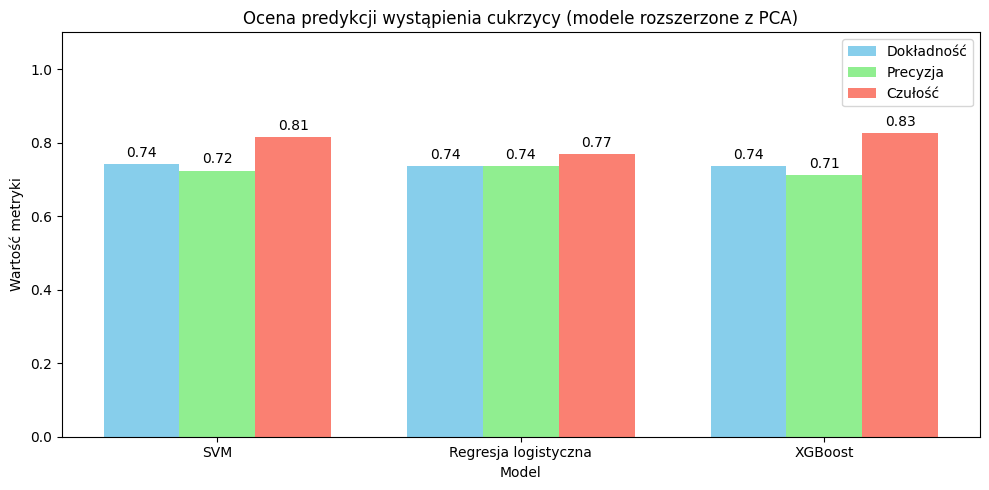

In [9]:
# Etykiety osi X
x_labels = ['SVM', 'Regresja logistyczna', 'XGBoost']

accuracy = accuracy_diabetes
precision = precision_diabetes
recall = recall_diabetes

# Funkcja do dodawania wartości słupków
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Wykresy przed przetworzeniem danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels))
width = 0.25

rects1 = ax.bar(x - width, accuracy, width, label='Dokładność', color='skyblue')
rects2 = ax.bar(x, precision, width, label='Precyzja', color='lightgreen')
rects3 = ax.bar(x + width, recall, width, label='Czułość', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Wartość metryki')
ax.set_title('Ocena predykcji wystąpienia cukrzycy (modele rozszerzone z PCA)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('cukrzyca_pca.png')
plt.show()

In [12]:
hypertension = pd.read_csv("/kaggle/input/choroby/hypertension_clean.csv")

X = hypertension.iloc[:, :-1]
y = hypertension.iloc[:, -1]

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model_pca(X_train, X_test, y_train, y_test, model_type='svm', kernel='rbf', C=0.1)
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model_pca(X_train, X_test, y_train, y_test, model_type='logistic', C=0.1, max_iter=1000)
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model_pca(X_train, X_test, y_train, y_test, model_type='xgboost', learning_rate=0.01, max_depth=7, min_child_weight=1, colsample_bytree=0.5)

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej:", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej:", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej:", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)

7.341500520706177
1.5143733024597168
0.02740478515625
0.000438690185546875
0.377213716506958
0.006443977355957031
Dokładność modelu SVM: 0.9340150491993054
Dokładność modelu regresji logistycznej: 0.8520162068300212
Dokładność modelu XGBoost: 0.9899672004630523
Precyzja modelu SVM: 0.9109522261943451
Precyzja modelu regresji logistycznej: 0.835031847133758
Precyzja modelu XGBoost: 0.9832019197805965
Czułość modelu SVM: 0.976314872866597
Czułość modelu regresji logistycznej: 0.9132706374085684
Czułość modelu XGBoost: 0.9989550679205852
Macierz pomyłek modelu SVM:  [[2038  274]
 [  68 2803]]
Macierz pomyłek regresji logistycznej:  [[1794  518]
 [ 249 2622]]
Macierz pomyłek modelu XGBoost:  [[2263   49]
 [   3 2868]]


In [13]:
accuracy_hypertension = [0.9340150491993054, 0.8520162068300212, 0.9899672004630523]
precision_hypertension = [0.9109522261943451, 0.835031847133758, 0.9832019197805965]
recall_hypertension = [0.976314872866597, 0.9132706374085684, 0.9989550679205852]
matrix_svm_hypertension = [[2038,  274], [ 68, 2803]]
matrix_log_hypertension = [[1794,  518], [249, 2622]]
matrix_xgb_hypertension = [[2263,    49], [3, 2868]]

In [ ]:
loading_matrix = pca.components_

# Tworzenie DataFrame dla przejrzystości
loading_df = pd.DataFrame(loading_matrix.T, index=hypertension.columns[:-1], columns=[f'PC{i+1}' for i in range(loading_matrix.shape[0])])

print(loading_df)

In [ ]:
# Znaczenie cech dla SVM (współczynniki wsparcia)
support_vectors = svm_model.support_vectors_
dual_coef = svm_model.dual_coef_
importance_svm = np.abs(np.dot(dual_coef, support_vectors).mean(axis=0))

plt.figure(figsize=(10, 6))
plt.barh(loading_df.index, importance_svm)
plt.xlabel('Wartość')
plt.ylabel('Główne składowe')
plt.title('Znaczenie cech w modelu SVM')
plt.grid()
plt.savefig('nadcisnienie_svm.png')
plt.show()

In [ ]:
# Znaczenie cech dla regresji logistycznej (współczynniki)
logistic_coefficients = logistic_model.coef_[0]
importance_logistic = np.abs(logistic_coefficients)

plt.figure(figsize=(10, 6))
plt.barh(loading_df.index, importance_logistic)
plt.xlabel('Wartość')
plt.ylabel('Główne składowe')
plt.title('Znaczenie cech w modelu regresji logistycznej')
plt.grid()
plt.savefig('nadcisnienie_regresja.png')
plt.show()

In [ ]:
# Znaczenie cech dla XGBoost
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgboost_model, importance_type='weight', xlabel='Wartość', ylabel='Główne składowe', title='Znaczenie cech w modelu XGBoost')
plt.grid()
plt.savefig('nadcisnienie_xgb.png')
plt.show()

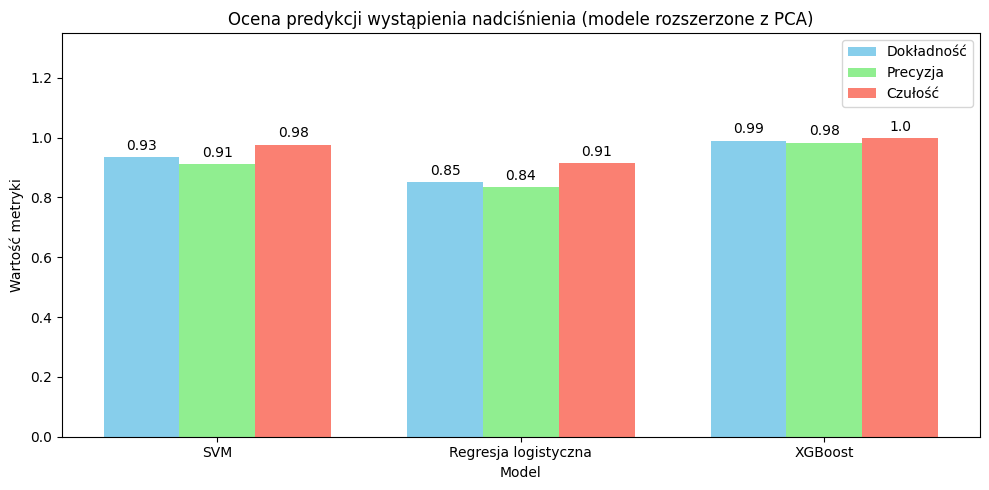

In [17]:
# Etykiety osi X
x_labels = ['SVM', 'Regresja logistyczna', 'XGBoost']

accuracy = accuracy_hypertension
precision = precision_hypertension
recall = recall_hypertension

# Funkcja do dodawania wartości słupków
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Wykresy przed przetworzeniem danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels))
width = 0.25

rects1 = ax.bar(x - width, accuracy, width, label='Dokładność', color='skyblue')
rects2 = ax.bar(x, precision, width, label='Precyzja', color='lightgreen')
rects3 = ax.bar(x + width, recall, width, label='Czułość', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Wartość metryki')
ax.set_title('Ocena predykcji wystąpienia nadciśnienia (modele rozszerzone z PCA)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1.35)
plt.tight_layout()
plt.savefig('nadcisnienie_pca.png')
plt.show()

In [19]:
stroke = pd.read_csv("/kaggle/input/choroby/stroke_clean.csv")

X = stroke.iloc[:, :-1]
y = stroke.iloc[:, -1]

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model_pca(X_train, X_test, y_train, y_test, model_type='svm', kernel='rbf', C=10)
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model_pca(X_train, X_test, y_train, y_test, model_type='logistic', C=0.1, max_iter=1000)
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model_pca(X_train, X_test, y_train, y_test, model_type='xgboost', learning_rate=0.3, max_depth=5, min_child_weight=5, colsample_bytree=0.5)

print("Dokładność modelu SVM:", svm_accuracy)
print("Dokładność modelu regresji logistycznej:", logistic_accuracy)
print("Dokładność modelu XGBoost:", xgboost_accuracy)

print("Precyzja modelu SVM:", svm_precision)
print("Precyzja modelu regresji logistycznej:", logistic_precision)
print("Precyzja modelu XGBoost:", xgboost_precision)

print("Czułość modelu SVM:", svm_recall)
print("Czułość modelu regresji logistycznej:", logistic_recall)
print("Czułość modelu XGBoost:", xgboost_recall)

print("Macierz pomyłek modelu SVM: ", svm_cm)
print("Macierz pomyłek regresji logistycznej: ", logistic_cm)
print("Macierz pomyłek modelu XGBoost: ", xgboost_cm)

40.1561496257782
5.701561212539673
0.027428150177001953
0.0004630088806152344
0.29544901847839355
0.006287097930908203
Dokładność modelu SVM: 0.7967120598699546
Dokładność modelu regresji logistycznej: 0.6831063673168937
Dokładność modelu XGBoost: 0.8075082811924917
Precyzja modelu SVM: 0.7850533807829182
Precyzja modelu regresji logistycznej: 0.7128855577976362
Precyzja modelu XGBoost: 0.799183281287533
Czułość modelu SVM: 0.8150246305418719
Czułość modelu regresji logistycznej: 0.6091133004926108
Czułość modelu XGBoost: 0.8194581280788177
Macierz pomyłek modelu SVM:  [[3185  906]
 [ 751 3309]]
Macierz pomyłek regresji logistycznej:  [[3095  996]
 [1587 2473]]
Macierz pomyłek modelu XGBoost:  [[3255  836]
 [ 733 3327]]


In [20]:
accuracy_stroke = [0.7967120598699546, 0.6831063673168937, 0.8075082811924917]
precision_stroke = [0.7850533807829182, 0.7128855577976362, 0.799183281287533]
recall_stroke = [0.8150246305418719, 0.6091133004926108, 0.8194581280788177]
matrix_svm_stroke = [[3185,  906], [751, 3309]]
matrix_log_stroke = [[3095, 996], [1587, 2473]]
matrix_xgb_stroke = [[3255,   836], [733, 3327]]

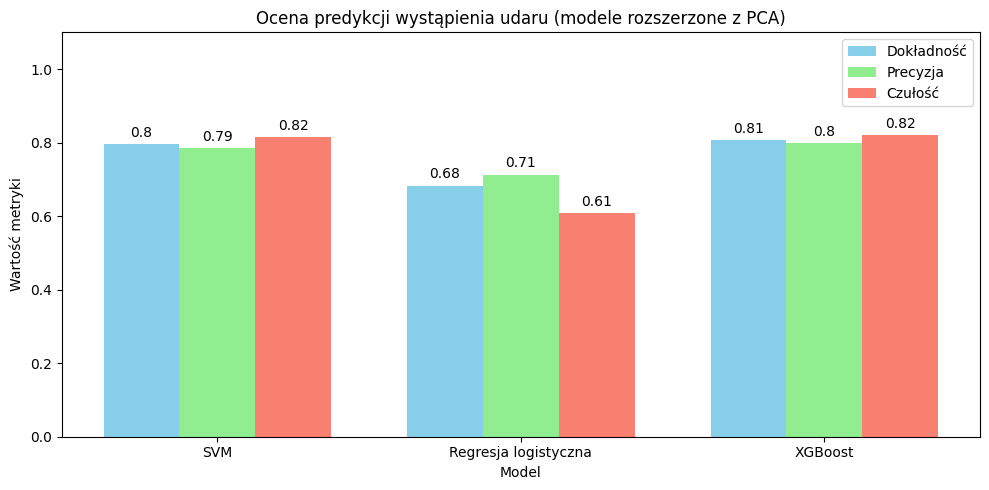

In [21]:
# Etykiety osi X
x_labels = ['SVM', 'Regresja logistyczna', 'XGBoost']

accuracy = accuracy_stroke
precision = precision_stroke
recall = recall_stroke

# Funkcja do dodawania wartości słupków
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Wykresy przed przetworzeniem danych
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(x_labels))
width = 0.25

rects1 = ax.bar(x - width, accuracy, width, label='Dokładność', color='skyblue')
rects2 = ax.bar(x, precision, width, label='Precyzja', color='lightgreen')
rects3 = ax.bar(x + width, recall, width, label='Czułość', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Wartość metryki')
ax.set_title('Ocena predykcji wystąpienia udaru (modele rozszerzone z PCA)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('udar_pca.png')
plt.show()

# Znaczenie cech

In [42]:
diabetes = pd.read_csv("/kaggle/input/choroby/diabetes_clean.csv")

svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(diabetes, model_type='svm', kernel='rbf', C=0.1)
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(diabetes, model_type='logistic', C=0.1, max_iter=1000, solver='liblinear')
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(diabetes, model_type='xgboost', learning_rate=0.01, max_depth=7, min_child_weight=3, colsample_bytree=0.5)

91.40661978721619
22.126835346221924
0.29769396781921387
0.0024771690368652344
0.6254904270172119
0.02133035659790039


In [43]:
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [44]:
loading_matrix = pca.components_

# Tworzenie DataFrame dla przejrzystości
loading_df = pd.DataFrame(loading_matrix.T, index=diabetes.columns[:-1], columns=[f'PC{i+1}' for i in range(loading_matrix.shape[0])])

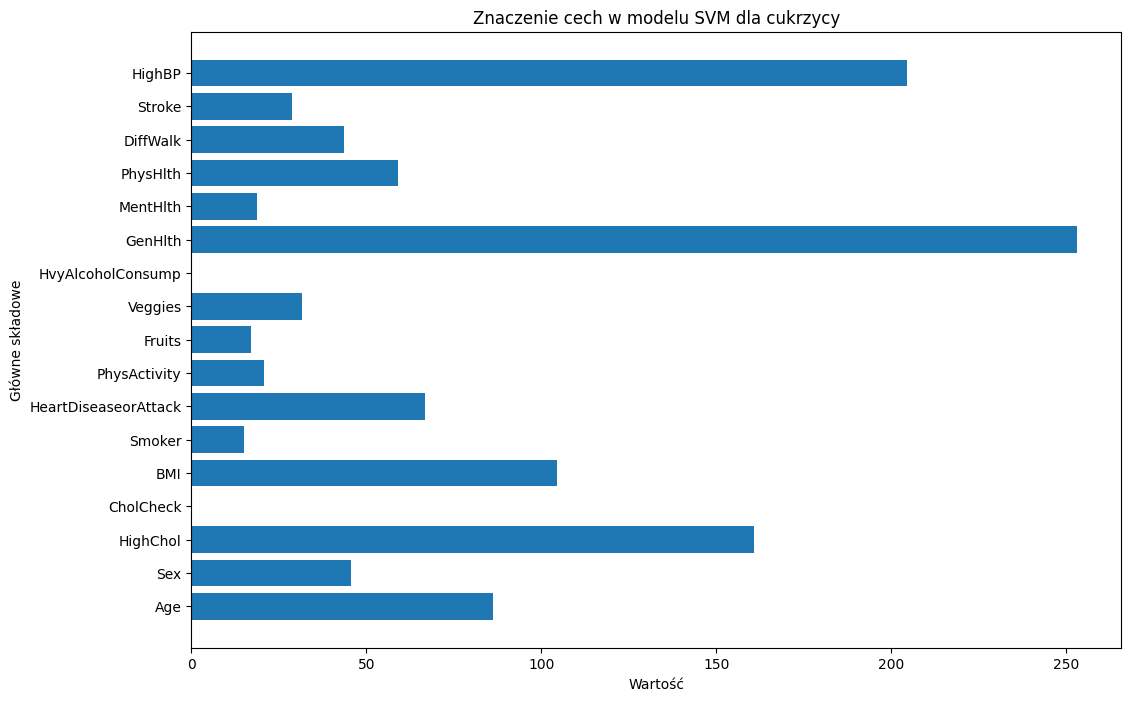

In [45]:
# Znaczenie cech dla SVM 
support_vectors = svm_model.support_vectors_
dual_coef = svm_model.dual_coef_
importance_svm = np.abs(np.dot(dual_coef, support_vectors).mean(axis=0))

# Tworzenie wykresu znaczenia cech dla SVM
plt.figure(figsize=(12, 8)) 
plt.barh(loading_df.index, importance_svm)
plt.xlabel('Wartość')
plt.ylabel('Główne składowe')
plt.title('Znaczenie cech w modelu SVM dla cukrzycy')

plt.savefig('cukrzyca_svm.png', bbox_inches='tight')
plt.show()

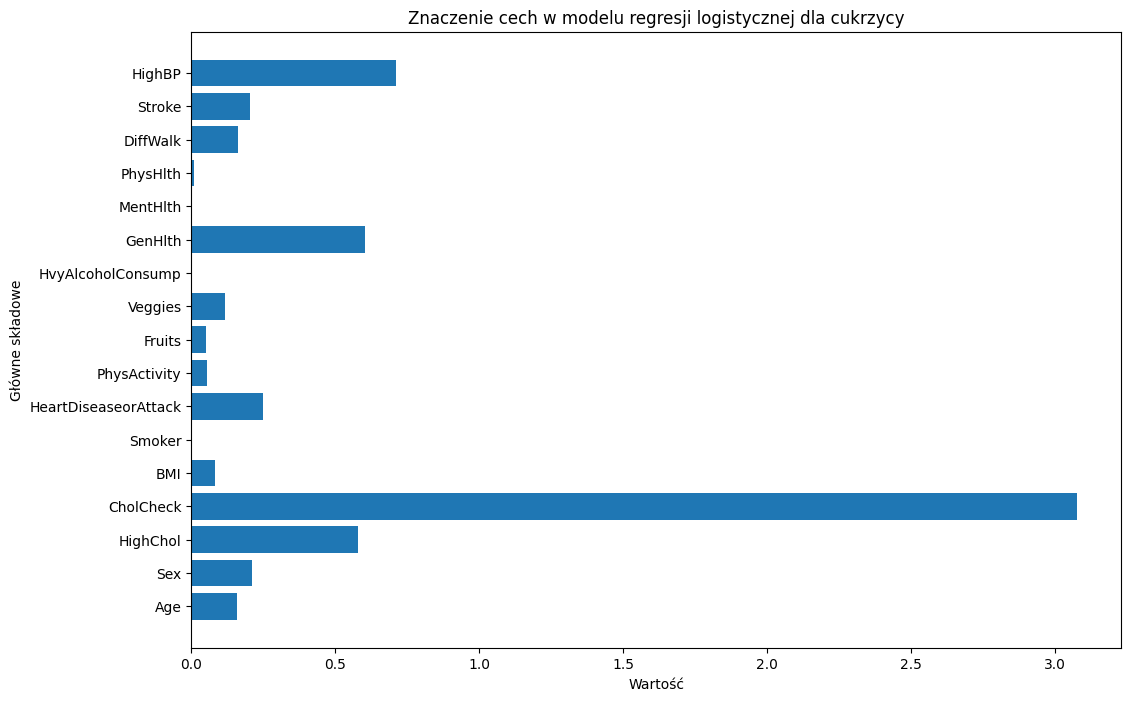

In [46]:
# Znaczenie cech dla regresji logistycznej (współczynniki)
logistic_coefficients = logistic_model.coef_[0]
importance_logistic = np.abs(logistic_coefficients)

plt.figure(figsize=(12, 8))
plt.barh(loading_df.index, importance_logistic)
plt.xlabel('Wartość')
plt.ylabel('Główne składowe')
plt.title('Znaczenie cech w modelu regresji logistycznej dla cukrzycy')

# Zapisanie wykresu do pliku
plt.savefig('cukrzyca_regresja.png', bbox_inches='tight')

# Wyświetlenie wykresu
plt.show()

<Figure size 1000x600 with 0 Axes>

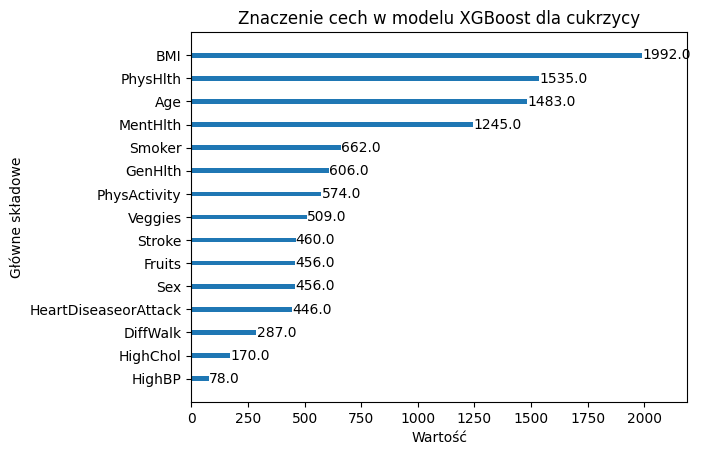

In [47]:
# Znaczenie cech dla XGBoost
plt.figure(figsize=(10, 6))
ax = xgb.plot_importance(xgboost_model, importance_type='weight')
ax.set_xlabel('Wartość')
ax.set_ylabel('Główne składowe')
ax.set_title('Znaczenie cech w modelu XGBoost dla cukrzycy')

plt.grid()
plt.savefig('cukrzyca_xgb.png', bbox_inches='tight')
plt.show()

In [48]:
hypertension = pd.read_csv("/kaggle/input/choroby/hypertension_clean.csv")

svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(hypertension, model_type='svm', kernel='rbf', C=0.1)
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(hypertension, model_type='logistic', C=0.1, max_iter=1000)
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(hypertension, model_type='xgboost', learning_rate=0.01, max_depth=7, min_child_weight=1, colsample_bytree=0.5)

16.047803163528442
3.921018123626709
1.7881834506988525
0.0037550926208496094
0.331174373626709
0.010735750198364258


In [49]:
X = hypertension.iloc[:, :-1]
y = hypertension.iloc[:, -1]

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [50]:
loading_matrix = pca.components_

# Tworzenie DataFrame dla przejrzystości
loading_df = pd.DataFrame(loading_matrix.T, index=hypertension.columns[:-1], columns=[f'PC{i+1}' for i in range(loading_matrix.shape[0])])

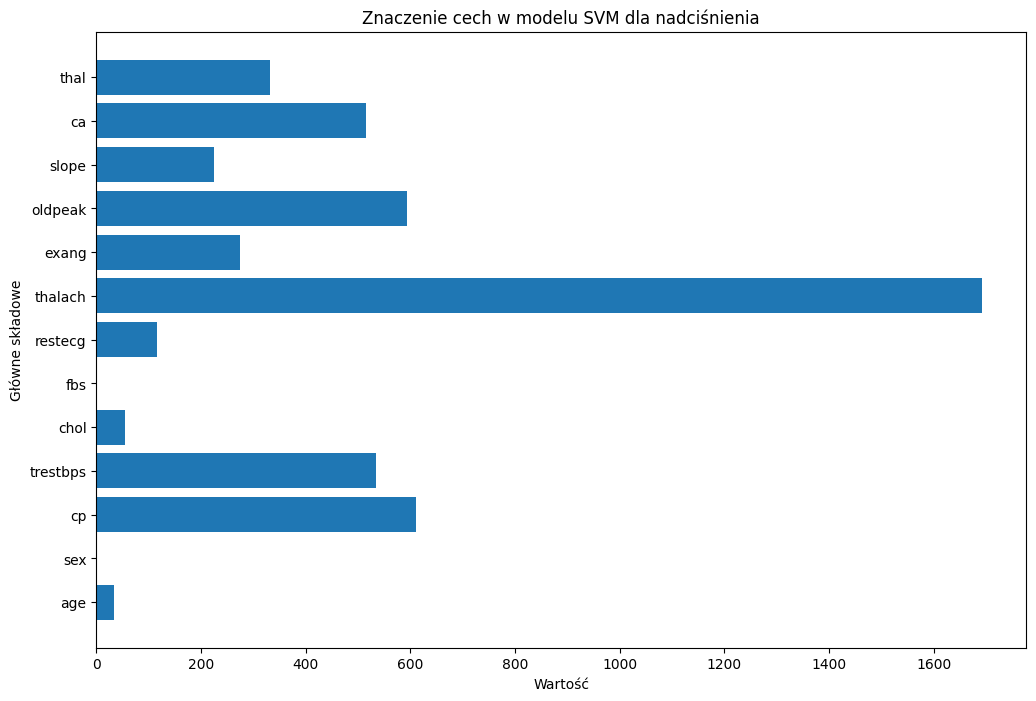

In [51]:
# Znaczenie cech dla SVM 
support_vectors = svm_model.support_vectors_
dual_coef = svm_model.dual_coef_
importance_svm = np.abs(np.dot(dual_coef, support_vectors).mean(axis=0))

# Tworzenie wykresu znaczenia cech dla SVM
plt.figure(figsize=(12, 8)) 
plt.barh(loading_df.index, importance_svm)
plt.xlabel('Wartość')
plt.ylabel('Główne składowe')
plt.title('Znaczenie cech w modelu SVM dla nadciśnienia')

plt.savefig('nadcisnienie_svm.png', bbox_inches='tight')
plt.show()

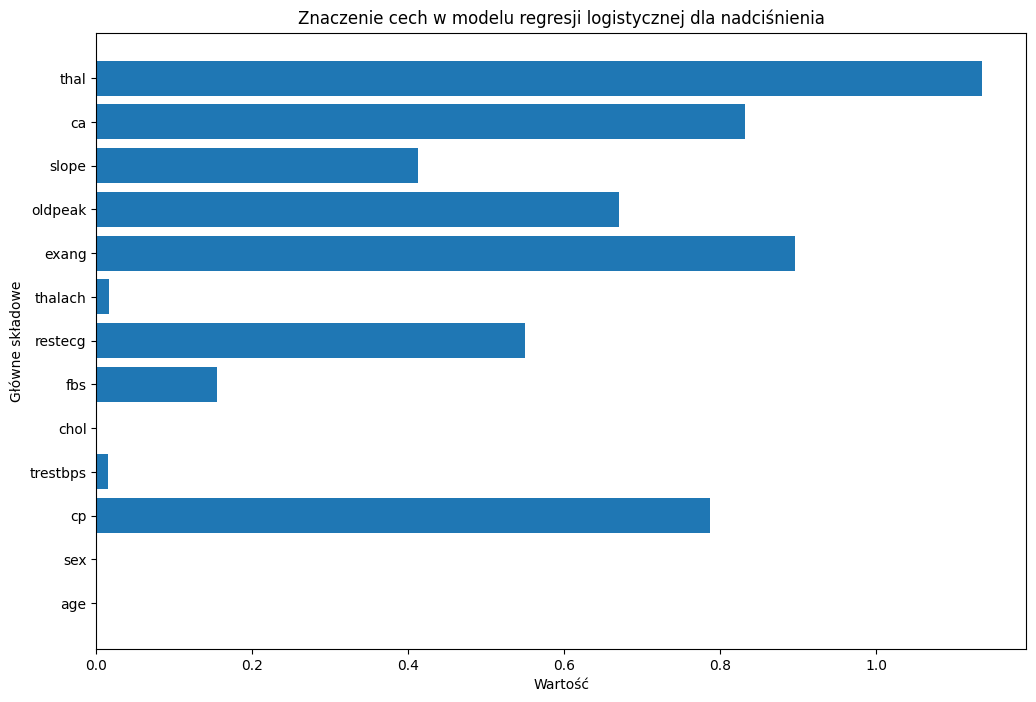

In [52]:
# Znaczenie cech dla regresji logistycznej (współczynniki)
logistic_coefficients = logistic_model.coef_[0]
importance_logistic = np.abs(logistic_coefficients)

plt.figure(figsize=(12, 8))
plt.barh(loading_df.index, importance_logistic)
plt.xlabel('Wartość')
plt.ylabel('Główne składowe')
plt.title('Znaczenie cech w modelu regresji logistycznej dla nadciśnienia')

# Zapisanie wykresu do pliku
plt.savefig('cukrzyca_nadcisnienie.png', bbox_inches='tight')

# Wyświetlenie wykresu
plt.show()

<Figure size 1000x600 with 0 Axes>

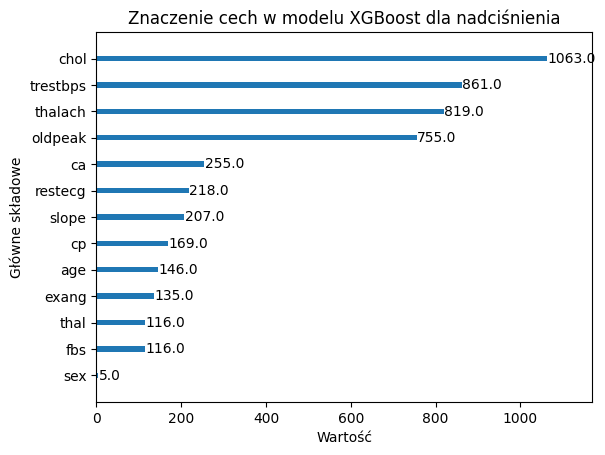

In [53]:
# Znaczenie cech dla XGBoost
plt.figure(figsize=(10, 6))
ax = xgb.plot_importance(xgboost_model, importance_type='weight')
ax.set_xlabel('Wartość')
ax.set_ylabel('Główne składowe')
ax.set_title('Znaczenie cech w modelu XGBoost dla nadciśnienia')

plt.grid()
plt.savefig('nadcisnienie_xgb.png', bbox_inches='tight')
plt.show()

In [54]:
stroke = pd.read_csv("/kaggle/input/choroby/stroke_clean.csv")

svm_model, svm_accuracy, svm_precision, svm_recall, svm_cm = train_model(stroke, model_type='svm', kernel='rbf', C=10)
logistic_model, logistic_accuracy, logistic_precision, logistic_recall, logistic_cm = train_model(stroke, model_type='logistic', C=0.1, max_iter=1000)
xgboost_model, xgboost_accuracy, xgboost_precision, xgboost_recall, xgboost_cm = train_model(stroke, model_type='xgboost', learning_rate=0.3, max_depth=5, min_child_weight=5, colsample_bytree=0.5)

39.32452392578125
9.458001852035522
1.0779955387115479
0.003847837448120117
0.2687833309173584
0.009478330612182617


In [55]:
X = stroke.iloc[:, :-1]
y = stroke.iloc[:, -1]

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [56]:
loading_matrix = pca.components_

# Tworzenie DataFrame dla przejrzystości
loading_df = pd.DataFrame(loading_matrix.T, index=stroke.columns[:-1], columns=[f'PC{i+1}' for i in range(loading_matrix.shape[0])])

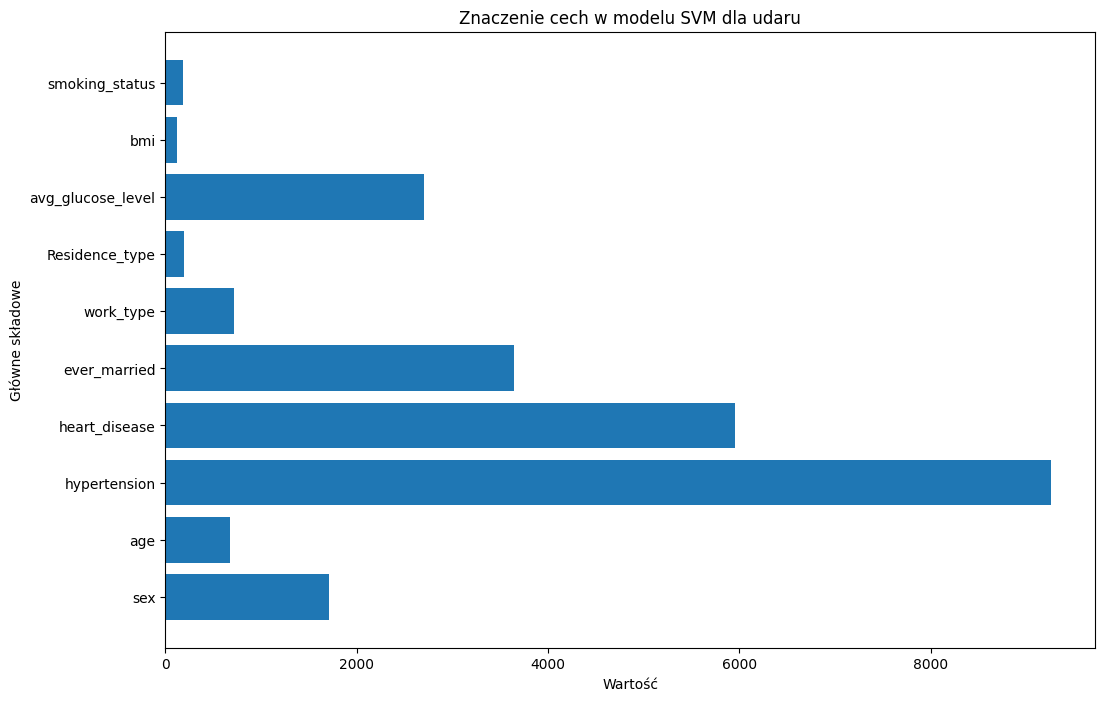

In [57]:
# Znaczenie cech dla SVM 
support_vectors = svm_model.support_vectors_
dual_coef = svm_model.dual_coef_
importance_svm = np.abs(np.dot(dual_coef, support_vectors).mean(axis=0))

# Tworzenie wykresu znaczenia cech dla SVM
plt.figure(figsize=(12, 8)) 
plt.barh(loading_df.index, importance_svm)
plt.xlabel('Wartość')
plt.ylabel('Główne składowe')
plt.title('Znaczenie cech w modelu SVM dla udaru')

plt.savefig('udar_svm.png', bbox_inches='tight')
plt.show()

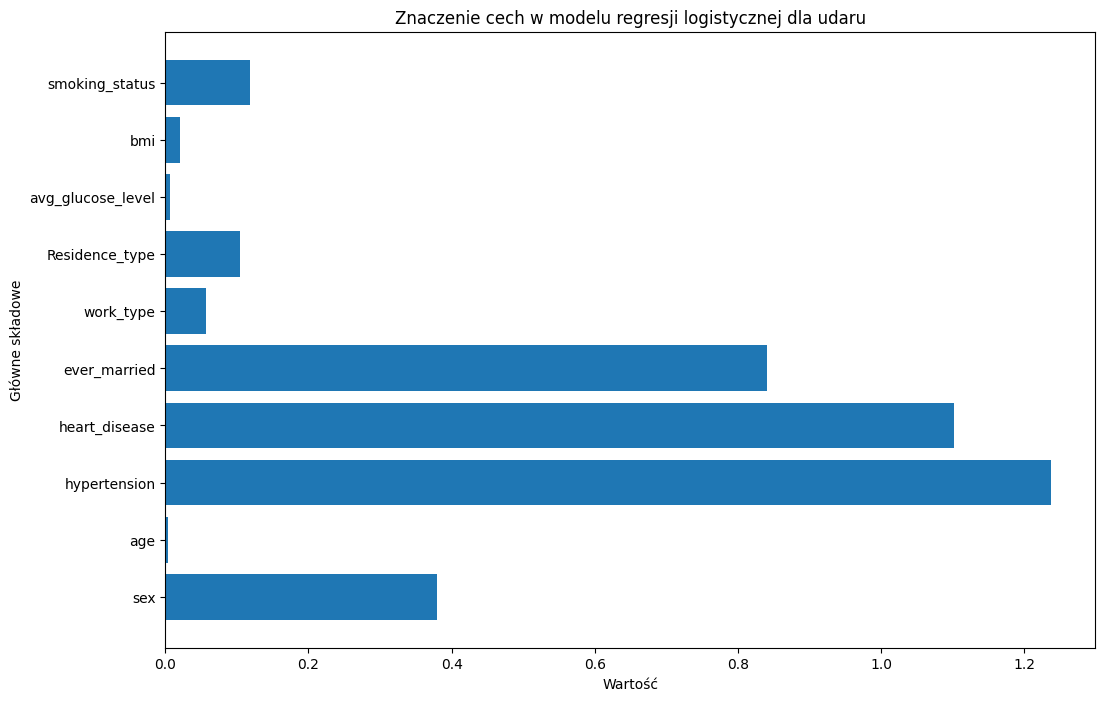

In [58]:
# Znaczenie cech dla regresji logistycznej (współczynniki)
logistic_coefficients = logistic_model.coef_[0]
importance_logistic = np.abs(logistic_coefficients)

plt.figure(figsize=(12, 8))
plt.barh(loading_df.index, importance_logistic)
plt.xlabel('Wartość')
plt.ylabel('Główne składowe')
plt.title('Znaczenie cech w modelu regresji logistycznej dla udaru')

# Zapisanie wykresu do pliku
plt.savefig('udar_regresja.png', bbox_inches='tight')

# Wyświetlenie wykresu
plt.show()

<Figure size 1000x600 with 0 Axes>

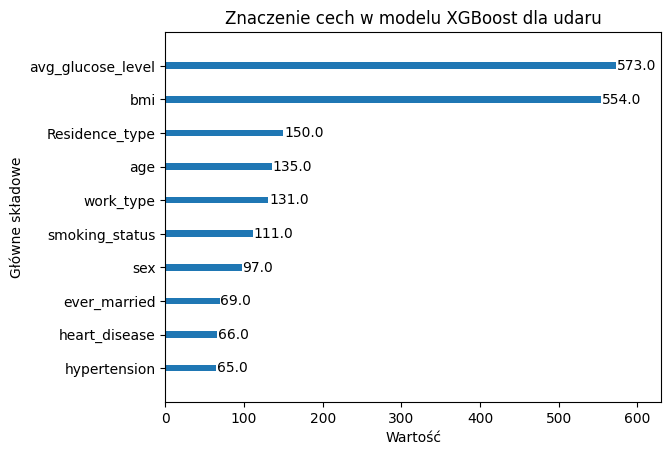

In [59]:
# Znaczenie cech dla XGBoost
plt.figure(figsize=(10, 6))
ax = xgb.plot_importance(xgboost_model, importance_type='weight')
ax.set_xlabel('Wartość')
ax.set_ylabel('Główne składowe')
ax.set_title('Znaczenie cech w modelu XGBoost dla udaru')

plt.grid()
plt.savefig('udar_xgb.png', bbox_inches='tight')
plt.show()